In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_ds = pd.read_csv('Sentiment Classification/training.txt', delimiter = "\t")
train_ds.head(5)

,1,The Da Vinci Code book is just awesome.
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [4]:
train_ds.rename(columns={'1': 'sentiment'}, inplace=True)

In [5]:
train_ds.rename(columns = {'The Da Vinci Code book is just awesome.': 'Text'}, inplace = True)

In [6]:
# to increase the column width, we use max_colwidth to read trucated data

In [7]:
print(train_ds.columns)

Index(['sentiment', 'Text'], dtype='object')


In [8]:
pd.set_option('max_colwidth', 800)
train_ds[train_ds['sentiment'] == 1].head(5)

,sentiment,Text
0,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
4,1,"that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course."


In [9]:
train_ds[train_ds.sentiment == 0][0:5]

,sentiment,Text
3942,0,da vinci code was a terrible movie.
3943,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3944,0,"The Da Vinci Code comes out tomorrow, which sucks."
3945,0,i thought the da vinci code movie was really boring.
3946,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [10]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6917 non-null   int64 
 1   Text       6917 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


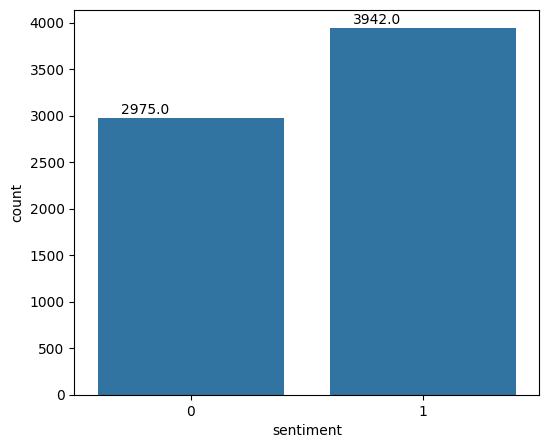

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (6,5))
ax = sns.countplot(x = 'sentiment', data = train_ds)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.1,
    p.get_height() + 50))

#### Text Preprocessing

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit( train_ds.Text)
features = feature_vector.get_feature_names_out()
print( "Total number of features: ", len(features))

Total number of features:  2132


In [14]:
import random

random.sample(list(features), 10)

['job',
 '2nd',
 'campaign',
 'still',
 'showing',
 'oddly',
 'updated',
 'boyy',
 'wait',
 'only']

In [15]:
train_ds_features = count_vectorizer.transform( train_ds.Text )
type(train_ds_features)

scipy.sparse._csr.csr_matrix

In [16]:
train_ds_features.shape

(6917, 2132)

In [17]:
train_ds_features.getnnz()

65390

In [18]:
print( "Density of the matrix: ",
       train_ds_features.getnnz() * 100 /
       (train_ds_features.shape[0] * train_ds_features.shape[1]))

Density of the matrix:  0.44341089644812887


### Displaying Document Vectors

In [20]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Setting the column names to the features i.e. words
train_ds_df.columns = features

In [21]:
train_ds[0:1]

,sentiment,Text
0,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [22]:
train_ds_df.iloc[0:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,0,0,0,0,0,0


In [23]:
train_ds_df[['the', 'da', "vinci", "code", "book", 'is', 'just', 'awesome']][0:1]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,0,0,0,0


### Removing low- Frequency Words

In [25]:
# summing up the occurances of features column wise
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts_df = pd.DataFrame( dict( features = features,counts = features_counts ) )

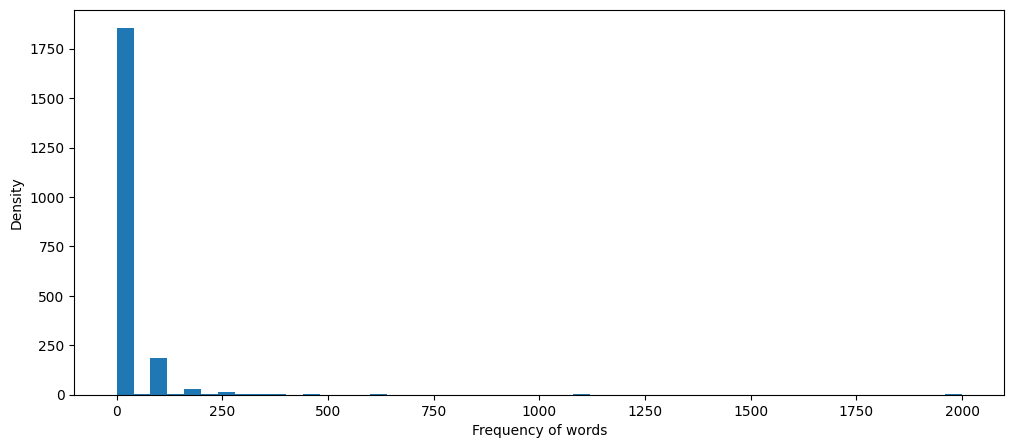

In [26]:
plt.figure( figsize=(12,5))
plt.hist(feature_counts_df.counts, bins=50, range = (0, 2000));
plt.xlabel( 'Frequency of words' )
plt.ylabel( 'Density' );

In [27]:
len(feature_counts_df[feature_counts_df.counts == 1])

1228

In [28]:
# there are 1228 words which are present only once across all document in the corpus

In [29]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.Text )
# Get the feature names
features = feature_vector.get_feature_names_out()
# Transform the document into vectors
train_ds_features = count_vectorizer.transform( train_ds.Text )
# Count the frequency of the features
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )

In [30]:
feature_counts.sort_values('counts', ascending = False)[0:15]

,features,counts
866,the,3305
37,and,2154
358,harry,2093
675,potter,2093
138,code,2001
104,brokeback,2000
178,da,2000
528,mountain,2000
934,vinci,2000
488,love,1624


### Removing Stop Words

In [32]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
#Printing first few stop words
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['seemed', 'we', 'five', 'other', 'made', 'neither', 'both', 'everything', 'somehow', 'rather']


In [33]:
# Adding custom words to the list of stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union( ['harry', 'potter', 'code', 'vinci', 'da',
'harry', 'mountain', 'movie', 'movies'])

### Creating Count Vectors

In [35]:
# if my_stop_words is a frozenset
my_stop_words = list(my_stop_words)

# or use sorted to get deterministic order
my_stop_words = sorted(my_stop_words)

count_vectorizer = CountVectorizer(stop_words=my_stop_words, max_features=1000)

# ensure text column is str
train_ds['Text'] = train_ds['Text'].astype(str)

feature_vector = count_vectorizer.fit(train_ds['Text'])
train_ds_features = count_vectorizer.transform(train_ds['Text'])
features = count_vectorizer.get_feature_names_out()


In [36]:
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
866,the,3305
37,and,2154
358,harry,2093
675,potter,2093
138,code,2001
104,brokeback,2000
178,da,2000
528,mountain,2000
934,vinci,2000
488,love,1624


In [68]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
#Custom function for stemming and stop word removal
def stemmed_words(doc):
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]
    return non_stop_words

In [72]:
count_vectorizer = CountVectorizer( analyzer=stemmed_words,max_features = 1000)
feature_vector = count_vectorizer.fit( train_ds['Text'])
train_ds_features = count_vectorizer.transform( train_ds['Text'])
features = feature_vector.get_feature_names_out()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1115
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


### Distribution of words across different sentiment

In [75]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Assign the features names to the column
train_ds_df.columns = features
# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = train_ds.sentiment

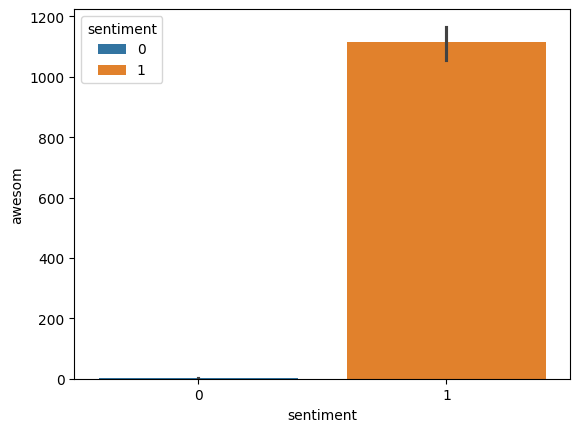

In [93]:
sns.barplot( x = 'sentiment', y = 'awesom', hue = 'sentiment', data = train_ds_df, estimator=sum );

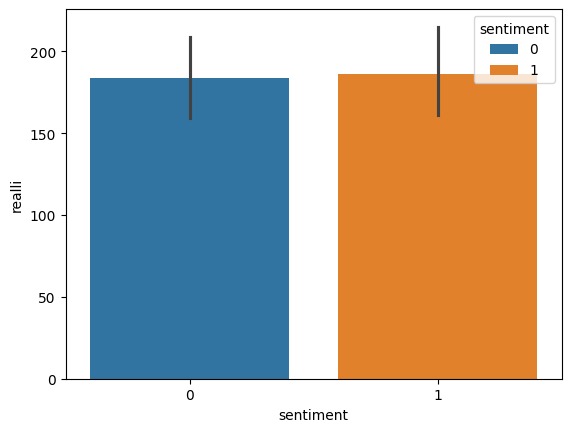

In [91]:
sns.barplot( x = 'sentiment', y = 'realli', hue = 'sentiment', data = train_ds_df, estimator=sum );

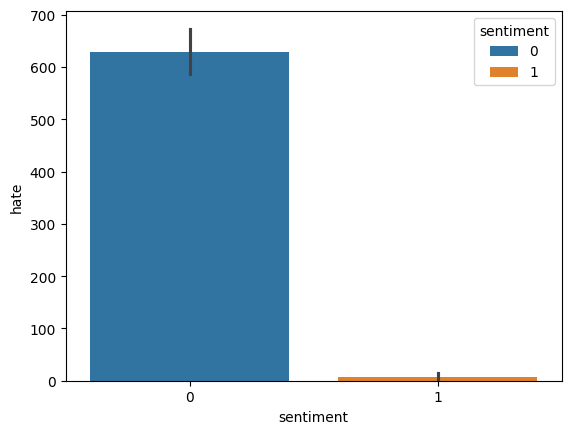

In [87]:
sns.barplot( x = 'sentiment', y = 'hate', hue="sentiment", data = train_ds_df, estimator=sum );

### Naive Bayes Model for Sentiment Classification

In [96]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,
                                                     train_ds.sentiment,
                                                     test_size = 0.3,
                                                     random_state = 42)

#### Build Naive Bayes Model

In [99]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


#### Make prediction on test case

In [102]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )

#### Print clasification report

In [107]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       862
           1       0.98      0.99      0.99      1214

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



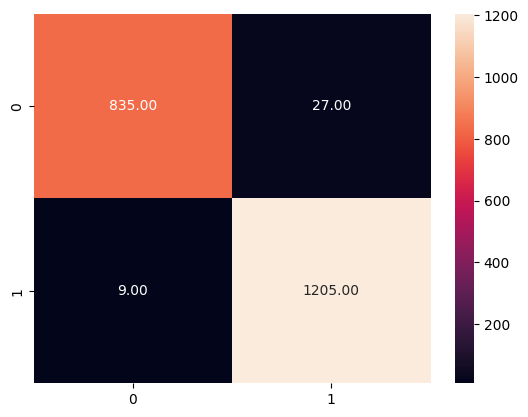

In [111]:
from sklearn import metrics
cm = metrics.confusion_matrix( test_y, test_ds_predicted )
sns.heatmap(cm, annot=True, fmt='.2f' );

## Using TF-IDF Vectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( analyzer=stemmed_words, max_features = 1000)
feature_vector = tfidf_vectorizer.fit( train_ds.Text )
train_ds_features = tfidf_vectorizer.transform( train_ds.Text )
features = feature_vector.get_feature_names_out()

In [116]:
from sklearn.naive_bayes import GaussianNB
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds.sentiment,
                                                     test_size = 0.3,
                                                     random_state = 42 )
nb_clf = GaussianNB()
nb_clf.fit( train_X.toarray(), train_y )

,priors,None
,var_smoothing,1e-09


In [118]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       862
           1       0.97      0.96      0.97      1214

    accuracy                           0.96      2076
   macro avg       0.96      0.96      0.96      2076
weighted avg       0.96      0.96      0.96      2076



## Using N-grams

In [131]:
import nltk
from nltk.stem import PorterStemmer
# library for regular expressions
import re
stemmer = PorterStemmer()
def get_stemmed_tokens( doc ):
# Tokenize the documents to words
    all_tokens = [word for word in nltk.word_tokenize(doc)]
    clean_tokens = []
# remove the all characters other than alphabets. It takes a regex for matching.
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
           clean_tokens.append(each_token)
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [141]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english',
                                   tokenizer=get_stemmed_tokens,
                                   ngram_range=(1,2))
feature_vector = tfidf_vectorizer.fit( train_ds['Text'] )
train_ds_features = tfidf_vectorizer.transform( train_ds['Text'])
features = feature_vector.get_feature_names_out()

In [145]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features, train_ds.sentiment,
                                                     test_size = 0.3,
                                                     random_state = 42 )
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       862
           1       0.96      1.00      0.98      1214

    accuracy                           0.97      2076
   macro avg       0.98      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



In [ ]:
# the recall for identifying positive sentiment document (with label 1) have increased to almost 1.o